# Problem Statement:

Find the salary according to year of exprience

# Import The Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import seaborn as sns
import matplotlib.pyplot as plt

# Import Data File

In [2]:
df=pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df['YearsExperience'].unique()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [5]:
df.nunique()

YearsExperience    28
Salary             30
dtype: int64

In [6]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

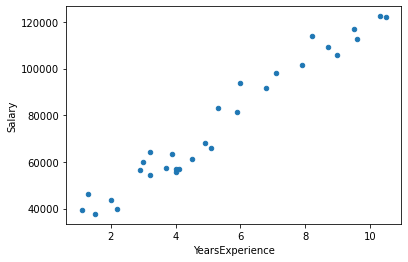

In [7]:
df.plot(x='YearsExperience' ,y='Salary', kind='scatter')

Here we found linear relation between input and output so, that we can use linear regreassion here to find accurancy

<AxesSubplot:xlabel='YearsExperience', ylabel='Count'>

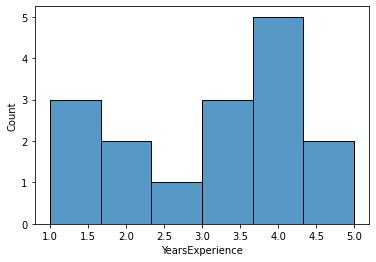

In [8]:
sns.histplot(data=df,x='YearsExperience',binrange=(1,5))

Plot of year of exprience between 1 to 5 year. Here we can see the count of people between 1 to 5 year exprience

<AxesSubplot:xlabel='YearsExperience', ylabel='Count'>

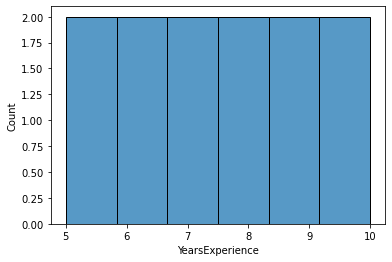

In [9]:
sns.histplot(data=df,x='YearsExperience',binrange=(5,10))

From this graph we can understand that the maximum number of employee are in 6 to 10 year exprinece

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

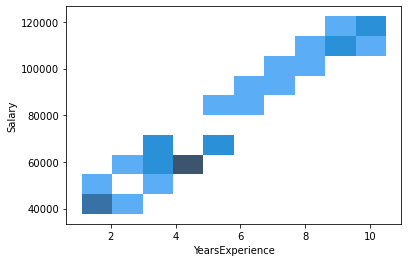

In [10]:
sns.histplot(data=df,x='YearsExperience',y='Salary',bins=10)

In [11]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

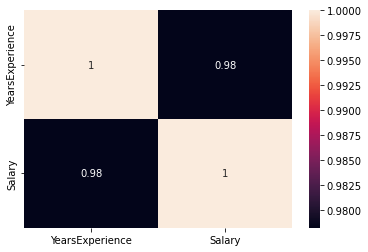

In [12]:
sns.heatmap(df.corr(), annot = True)

plot of coeffient of corelation to check corelation between input and output varibles

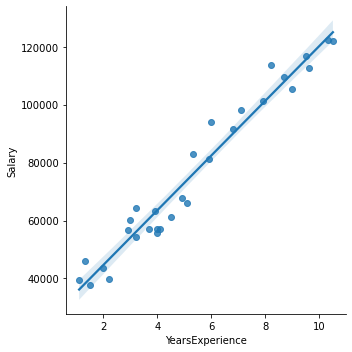

In [13]:
sns.lmplot(data=df,x='YearsExperience',y='Salary')

Graph showwing best fit line using gradient decent algorithm at back end

In [14]:
x=df['YearsExperience']
y=df['Salary']

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5)

x_train

21     7.1
28    10.3
0      1.1
17     5.3
5      2.9
1      1.3
27     9.6
12     4.0
20     6.8
19     6.0
24     8.7
7      3.2
4      2.2
8      3.2
9      3.7
16     5.1
22     7.9
6      3.0
15     4.9
14     4.5
3      2.0
Name: YearsExperience, dtype: float64

Here we have split the data in two part 30% for Testing and 70% for Training

In [25]:
x_train=x_train[:,np.newaxis]
x_test=x_test[:,np.newaxis]

C:\Users\harshada\AppData\Local\Temp\ipykernel_12136\3168945171.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train=x_train[:,np.newaxis]
C:\Users\harshada\AppData\Local\Temp\ipykernel_12136\3168945171.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_test=x_test[:,np.newaxis]


In [26]:
model=LinearRegression()
model

LinearRegression()

we have used linear regression to train the model

In [27]:
model.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred_test = model.predict(x_test)
y_pred_test

array([ 64374.49262392, 124811.92649812, 103426.3729734 , 110864.82637331,
        82040.81944869,  63444.68594893,  41129.32574923,  65304.29929891,
       115513.85974824])

In [29]:
y_test

11     55794.0
29    121872.0
23    113812.0
25    105582.0
18     81363.0
10     63218.0
2      37731.0
13     57081.0
26    116969.0
Name: Salary, dtype: float64

In [30]:
r2_score(y_test,y_pred_test)

0.9624024983951907

we have found R2score to check performance of our model and it 96% which is great

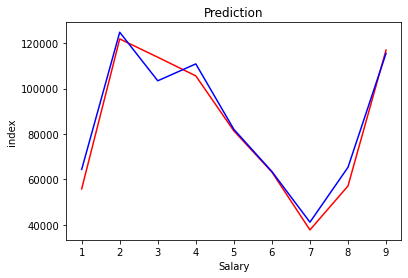

In [31]:
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred_test,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

This plot we use every time to check our prediction